In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
movies_database = pd.read_csv('rotten_tomatoes_movies.csv')
reviews_database = pd.read_csv('rotten_tomatoes_movie_reviews.csv')

### Retirar linhas com muitas colunas nulas e colunas desnecessárias

- contar nulos em cada base
- excluir colunas que tem bastante nulo

In [5]:
tamanho_base_filmes = movies_database.shape[0]

for column in movies_database.columns:
    #print(column, movies_database[column].isnull().sum())
    porcentagem = movies_database[column].isnull().sum() / tamanho_base_filmes
    print(f"{column}: {porcentagem * 100:.2f}")


colunas_exclusao = ['rating', 'ratingContents', 'distributor', 'soundMix', 'releaseDateTheaters']

movies_database = movies_database.drop(columns=colunas_exclusao)
print("Exclusão feita com sucesso")

id: 0.00
title: 0.26
audienceScore: 48.87
tomatoMeter: 76.35
rating: 90.23
ratingContents: 90.23
releaseDateTheaters: 78.52
releaseDateStreaming: 44.56
runtimeMinutes: 9.65
genre: 7.74
originalLanguage: 9.67
director: 2.94
writer: 37.10
boxOffice: 89.71
distributor: 83.94
soundMix: 88.89
Exclusão feita com sucesso


In [6]:
tamanho_base_criticas = reviews_database.shape[0]
print(tamanho_base_criticas)

for column in reviews_database.columns:
    #print(column, reviews_database[column].isnull().sum())
    porcentagem = reviews_database[column].isnull().sum() / tamanho_base_criticas
    print(f"{column}: {porcentagem * 100:.2f}")

# tirar linhas que não tem original score, já que não dá pra saber a nota específica
reviews_database = reviews_database.dropna(subset=['originalScore'])

reviews_database.drop(columns=['reviewUrl'], inplace=True)

1444963
id: 0.00
reviewId: 0.00
creationDate: 0.00
criticName: 0.00
isTopCritic: 0.00
originalScore: 30.12
reviewState: 0.00
publicatioName: 0.00
reviewText: 4.79
scoreSentiment: 0.00
reviewUrl: 14.60


In [7]:
print(reviews_database['originalScore'].value_counts())

linhas_excluidas = 0


for index, row in reviews_database.iterrows():
    
    nota_original = row['originalScore']
    nota = nota_original.split('/')

    if len(nota) == 2:
        
        try:
            nota_nova = float(nota[0]) / float(nota[1]) * 100

        except Exception as e:
            reviews_database.drop(index, inplace=True)
            linhas_excluidas += 1

        else:
            reviews_database.at[index, 'originalScore'] = nota_nova

print(reviews_database['originalScore'].value_counts())
print(f"Linhas excluídas: {linhas_excluidas}")
print("Tamanho do dataset após exclusão: ", reviews_database.shape[0])


originalScore
3/5               116711
4/5               110222
3/4                82297
2/5                72787
2/4                50645
                   ...  
5.9332482/10           1
8.701419/10            1
8.248120421/10         1
6.7/8                  1
7.44224848/10          1
Name: count, Length: 1729, dtype: int64
originalScore
60.000000    130375
80.000000    126393
50.000000     87203
75.000000     86664
40.000000     79641
              ...  
81.842000         1
48.270000         1
78.642466         1
50.500000         1
74.422485         1
Name: count, Length: 1244, dtype: int64
Linhas excluídas: 312
Tamanho do dataset após exclusão:  1009433


### Juntando as bases de filmes e críticas através do Id

In [33]:
df_movies_critics = pd.merge(movies_database, reviews_database, on='id')

In [34]:
df_movies_critics

,id,title,audienceScore,tomatoMeter,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,writer,boxOffice,reviewId,creationDate,criticName,isTopCritic,originalScore,reviewState,publicatioName,reviewText,scoreSentiment
0,love_lies,"Love, Lies",43.0,NaN,NaN,120.0,Drama,Korean,"Park Heung-Sik,Heung-Sik Park","Ha Young-Joon,Jeon Yun-su,Song Hye-jin",NaN,2739073,2020-10-31,James Mudge,False,80.0,fresh,easternKicks.com,Though let down by its routine love triangle n...,POSITIVE
1,love_lies,"Love, Lies",43.0,NaN,NaN,120.0,Drama,Korean,"Park Heung-Sik,Heung-Sik Park","Ha Young-Joon,Jeon Yun-su,Song Hye-jin",NaN,2333658,2016-06-15,Diva Velez,False,70.0,fresh,TheDivaReview.com,"While not perfect, Love, Lies is a worthy disc...",POSITIVE
2,adrift_2018,Adrift,65.0,69.0,2018-08-21,120.0,"Adventure, Drama, Romance",English,Baltasar Kormákur,"Aaron Kandell,Jordan Kandell,David Branson Smith",$31.4M,102694850,2022-05-29,Josh Parham,False,60.0,fresh,Next Best Picture,This is nowhere near the level of other great ...,POSITIVE
3,adrift_2018,Adrift,65.0,69.0,2018-08-21,120.0,"Adventure, Drama, Romance",English,Baltasar Kormákur,"Aaron Kandell,Jordan Kandell,David Branson Smith",$31.4M,2816011,2021-08-21,Kip Mooney,False,C+,rotten,College Movie Review,"For almost the entire runtime, the only people...",NEGATIVE
4,adrift_2018,Adrift,65.0,69.0,2018-08-21,120.0,"Adventure, Drama, Romance",English,Baltasar Kormákur,"Aaron Kandell,Jordan Kandell,David Branson Smith",$31.4M,2772153,2021-02-28,Richard Crouse,False,40.0,rotten,Richard Crouse,What is meant to be a voyage of self-discovery...,NEGATIVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1026391,the-human-body,The Human Body,71.0,89.0,NaN,43.0,Documentary,English,Peter Georgi,Richard Dale,NaN,276090,2001-12-29,Catharine Tunnacliffe,False,60.0,fresh,eye WEEKLY,A movie about the hard-to-reach interior lands...,POSITIVE
1026392,the-human-body,The Human Body,71.0,89.0,NaN,43.0,Documentary,English,Peter Georgi,Richard Dale,NaN,276088,2001-12-29,E! Staff,False,A,fresh,E! Online,"Among the X-rayed, magnified wonders: food get...",POSITIVE
1026393,the-human-body,The Human Body,71.0,89.0,NaN,43.0,Documentary,English,Peter Georgi,Richard Dale,NaN,276083,2001-12-29,Bridget Byrne,False,40.0,rotten,Boxoffice Magazine,The impression left is that of a series of sli...,NEGATIVE
1026394,the-human-body,The Human Body,71.0,89.0,NaN,43.0,Documentary,English,Peter Georgi,Richard Dale,NaN,276084,2001-12-29,Ross Anthony,False,62.5,fresh,Hollywood Report Card,"Though plenty of room for improvement exists, ...",POSITIVE


In [35]:
for column in df_movies_critics.columns:
    #print(column, df_movies_critics[column].isnull().sum())
    porcentagem = df_movies_critics[column].isnull().sum() / df_movies_critics.shape[0]
    print(f"{column}: {porcentagem * 100:.2f}")

id: 0.00
title: 0.39
audienceScore: 3.78
tomatoMeter: 4.33
releaseDateStreaming: 6.66
runtimeMinutes: 1.70
genre: 1.42
originalLanguage: 1.70
director: 0.60
writer: 9.98
boxOffice: 28.53
reviewId: 0.00
creationDate: 0.00
criticName: 0.00
isTopCritic: 0.00
originalScore: 0.00
reviewState: 0.00
publicatioName: 0.00
reviewText: 6.83
scoreSentiment: 0.00


In [36]:
print(f"Linhas antes da exclusão: {df_movies_critics.shape[0]}")

df_movies_critics.dropna(subset=['audienceScore', 'tomatoMeter', 'runtimeMinutes', 'boxOffice'], inplace=True)

print(f"Linhas após a exclusão: {df_movies_critics.shape[0]}")

df_movies_critics.to_csv('base_merge.csv', index=False)

Linhas antes da exclusão: 1026396
Linhas após a exclusão: 730027


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

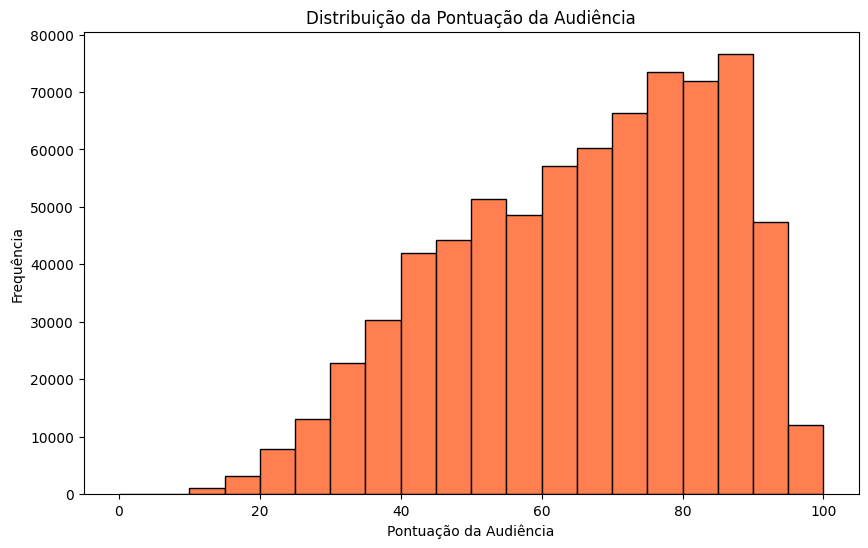

In [3]:
df_movies_critics = pd.read_csv('base_merge.csv')

# Plotando o histograma
plt.figure(figsize=(10, 6))
plt.hist(df_movies_critics['audienceScore'], bins=20, color='coral', edgecolor='black')
plt.title('Distribuição da Pontuação da Audiência')
plt.xlabel('Pontuação da Audiência')
plt.ylabel('Frequência')
plt.show()

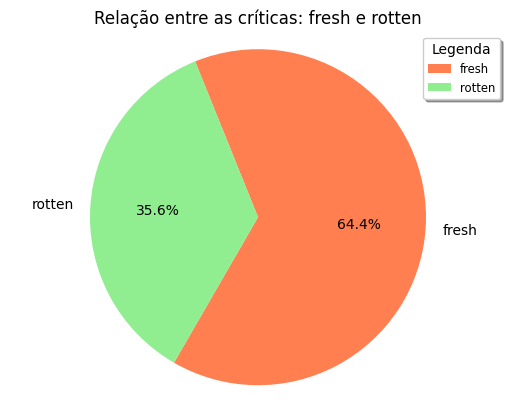

In [4]:
plt.pie(df_movies_critics['reviewState'].value_counts(), labels=df_movies_critics['reviewState'].value_counts().index, autopct='%1.1f%%', startangle=240, colors = ['coral', 'lightgreen'])
plt.title("Relação entre as críticas: fresh e rotten")
plt.legend(loc='upper right', fontsize='small', title='Legenda', title_fontsize='medium', shadow=True, fancybox=True)
plt.axis('equal')

plt.show()

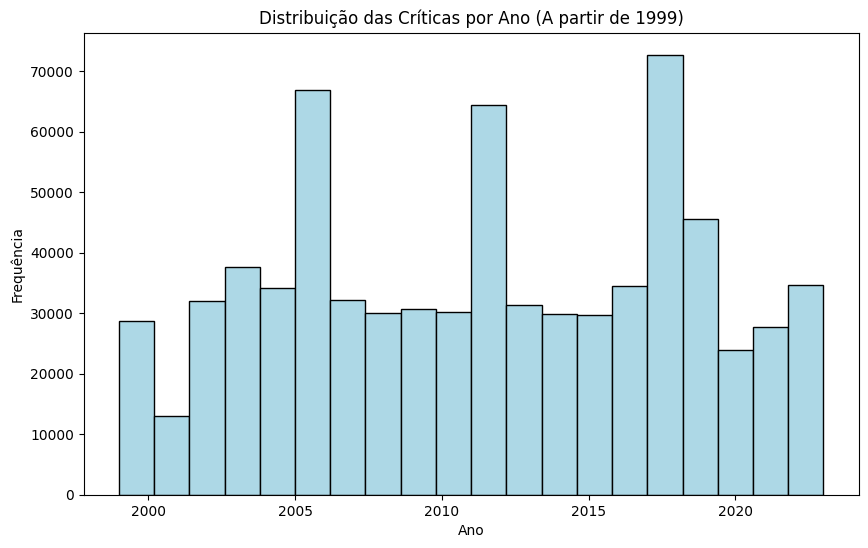

In [5]:
df_movies_critics['creationDate'] = pd.to_datetime(df_movies_critics['creationDate'])

# Criar uma cópia filtrada dos dados a partir de 1995
df_filtered = df_movies_critics[df_movies_critics['creationDate'].dt.year >= 1999]

# Extrair o ano das datas de criação das críticas
ano_criacao_criticas = df_filtered['creationDate'].dt.year

# Plotando o histograma
plt.figure(figsize=(10, 6))
plt.hist(ano_criacao_criticas, bins=20, color='lightblue', edgecolor='black')
plt.title('Distribuição das Críticas por Ano (A partir de 1999)')
plt.xlabel('Ano')
plt.ylabel('Frequência')
plt.show()

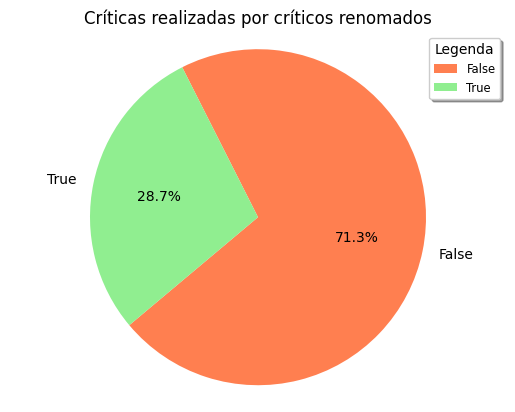

In [6]:
plt.pie(df_movies_critics['isTopCritic'].value_counts(), labels=df_movies_critics['isTopCritic'].value_counts().index, autopct='%1.1f%%', startangle=220, colors=['coral', 'lightgreen'])
plt.title("Críticas realizadas por críticos renomados")
plt.legend(loc='upper right', fontsize='small', title='Legenda', title_fontsize='medium', shadow=True, fancybox=True)
plt.axis('equal')

plt.show()

In [7]:
# tratar coluna boxOffice

def converter_bilheteria(valor):
    if valor.endswith('M'):
        return float(valor[1:-1]) * 1_000_000
    elif valor.endswith('K'):
        return float(valor[1:-1]) * 1_000
    elif valor.endswith('B'):
        return float(valor[1:-1]) * 1_000_000_000
    else:
        return float(valor[1:])

# Aplicando a função em cada linha da coluna 'bilheteria'
for index, row in df_movies_critics.iterrows():
    df_movies_critics.at[index, 'boxOffice'] = converter_bilheteria(row['boxOffice'])

# Visualizando o DataFrame após a conversão
print(df_movies_critics)

KeyboardInterrupt: 

In [ ]:
df_movies_critics.to_csv('base_merge.csv', index=False)

# Clusterização

In [8]:
import pandas as pd

df_movies_critics = pd.read_csv('base_merge.csv')

generos_unicos = set(df_movies_critics['genre'].str.split(', ').explode())

for genero in generos_unicos:

    df_movies_critics[genero] = False
    
    df_movies_critics.loc[df_movies_critics['genre'].str.contains(genero), genero] = True

df_movies_critics.drop(columns=['genre'], inplace=True)

print(df_movies_critics.head())


            id   title  audienceScore  tomatoMeter releaseDateStreaming  \
0  adrift_2018  Adrift           65.0         69.0           2018-08-21   
1  adrift_2018  Adrift           65.0         69.0           2018-08-21   
2  adrift_2018  Adrift           65.0         69.0           2018-08-21   
3  adrift_2018  Adrift           65.0         69.0           2018-08-21   
4  adrift_2018  Adrift           65.0         69.0           2018-08-21   

   runtimeMinutes originalLanguage           director  \
0           120.0          English  Baltasar Kormákur   
1           120.0          English  Baltasar Kormákur   
2           120.0          English  Baltasar Kormákur   
3           120.0          English  Baltasar Kormákur   
4           120.0          English  Baltasar Kormákur   

                                             writer boxOffice  ...  Horror  \
0  Aaron Kandell,Jordan Kandell,David Branson Smith    $31.4M  ...   False   
1  Aaron Kandell,Jordan Kandell,David Branson Smit

In [10]:
df_movies_critics.to_csv('base_merge.csv', index=False)

df_movies_critics.columns

Index(['id', 'title', 'audienceScore', 'tomatoMeter', 'releaseDateStreaming',
       'runtimeMinutes', 'originalLanguage', 'director', 'writer', 'boxOffice',
       'reviewId', 'creationDate', 'criticName', 'isTopCritic',
       'originalScore', 'reviewState', 'publicatioName', 'reviewText',
       'scoreSentiment', 'Action', 'Mystery & thriller', 'Fantasy',
       'Adventure', 'Comedy', 'History', 'War', 'Holiday', 'Musical',
       'Gay & lesbian', 'Romance', 'Lgbtq+', 'Western', 'Horror',
       'Documentary', 'Drama', 'Crime', 'Kids & family', 'Animation',
       'Biography', 'Anime', 'Music', 'Sci-fi'],
      dtype='object')

In [12]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

df_movies_critics = pd.read_csv('base_merge.csv')

colunas_clusterizacao = ['War', 'Mystery & thriller', 'Romance', 'Sci-fi',
       'Biography', 'Western', 'Fantasy', 'Kids & family', 'Holiday', 'Crime',
       'Lgbtq+', 'Horror', 'Documentary', 'Adventure', 'History', 'Music',
       'Animation', 'Anime', 'Musical', 'Action', 'Gay & lesbian', 'Comedy',
       'Drama', 'audienceScore', 'tomatoMeter', 'runtimeMinutes']

dados_clusterizacao = df_movies_critics[colunas_clusterizacao]

scaler = StandardScaler()
dados_clusterizacao_normalizados = scaler.fit_transform(dados_clusterizacao)

dbscan = DBSCAN(eps=0.5, min_samples=1000)
clusters = dbscan.fit_predict(dados_clusterizacao_normalizados)

df_movies_critics['cluster'] = clusters

print(df_movies_critics[['id', 'cluster']])


                 id  cluster
0       adrift_2018       -1
1       adrift_2018       -1
2       adrift_2018       -1
3       adrift_2018       -1
4       adrift_2018       -1
...             ...      ...
730022     fun_size       -1
730023     fun_size       -1
730024     fun_size       -1
730025     fun_size       -1
730026     fun_size       -1

[730027 rows x 2 columns]


In [13]:
# Verificar quantos clusters foram gerados
num_clusters = len(df_movies_critics['cluster'].unique())
print("Número de clusters:", num_clusters)

# Visualizar os resultados
print(df_movies_critics[['id', 'cluster']])

print(df_movies_critics['cluster'].value_counts())

Número de clusters: 40
                 id  cluster
0       adrift_2018       -1
1       adrift_2018       -1
2       adrift_2018       -1
3       adrift_2018       -1
4       adrift_2018       -1
...             ...      ...
730022     fun_size       -1
730023     fun_size       -1
730024     fun_size       -1
730025     fun_size       -1
730026     fun_size       -1

[730027 rows x 2 columns]
cluster
-1     445772
 2      81618
 1      51559
 3      34669
 0      30475
 4      17045
 5       8114
 8       5641
 6       4937
 21      3817
 7       3295
 9       3114
 19      2889
 17      2636
 22      2360
 37      2105
 20      1944
 26      1867
 11      1863
 29      1840
 25      1654
 35      1424
 30      1422
 28      1386
 24      1355
 23      1256
 14      1213
 10      1209
 31      1153
 33      1124
 34      1075
 27      1049
 16      1045
 36      1031
 12      1029
 38      1026
 13      1019
 15       889
 32       626
 18       482
Name: count, dtype: int64


# em cada cluster:
- ver o gênero predominante de cada um;
- checar sentimento das críticas

In [15]:
df_movies_critics.to_csv('base_clusterizada.csv', index=False)

In [19]:
generos = ['War', 'Mystery & thriller', 'Romance', 'Sci-fi', 'Biography', 'Western', 
           'Fantasy', 'Kids & family', 'Holiday', 'Crime', 'Lgbtq+', 'Horror', 
           'Documentary', 'Adventure', 'History', 'Music', 'Animation', 'Anime', 
           'Musical', 'Action', 'Gay & lesbian', 'Comedy', 'Drama']

# Inicializar um dicionário para armazenar o gênero predominante de cada cluster
genero_predominante = {}

# Iterar sobre cada cluster
for cluster in df_movies_critics['cluster'].unique():
    if cluster == -1:
        continue  # Pular o ruído
    
    # Filtrar o DataFrame para o cluster atual
    cluster_data = df_movies_critics[df_movies_critics['cluster'] == cluster]
    
    # Contar a ocorrência de cada gênero no cluster
    genero_contagem = cluster_data[generos].sum().sort_values(ascending=False)
    
    # Identificar o gênero predominante
    genero_predominante[cluster] = genero_contagem.index[:3].tolist()

# Exibir o gênero predominante de cada cluster
for cluster, genero in genero_predominante.items():
    print(f"Cluster {cluster}: Gênero predominante é {genero}")


Cluster 2: Gênero predominante é ['Drama', 'Documentary', 'Comedy']
Cluster 0: Gênero predominante é ['Documentary', 'War', 'Comedy']
Cluster 1: Gênero predominante é ['Comedy', 'War', 'Documentary']
Cluster 3: Gênero predominante é ['Drama', 'Comedy', 'Documentary']
Cluster 5: Gênero predominante é ['Horror', 'Mystery & thriller', 'Documentary']
Cluster 4: Gênero predominante é ['Romance', 'Comedy', 'War']
Cluster 26: Gênero predominante é ['Drama', 'Biography', 'History']
Cluster 27: Gênero predominante é ['Action', 'Mystery & thriller', 'War']
Cluster 9: Gênero predominante é ['Drama', 'Crime', 'Mystery & thriller']
Cluster 6: Gênero predominante é ['Drama', 'Mystery & thriller', 'Documentary']
Cluster 7: Gênero predominante é ['Drama', 'Biography', 'Documentary']
Cluster 24: Gênero predominante é ['Drama', 'Mystery & thriller', 'Documentary']
Cluster 25: Gênero predominante é ['Drama', 'Lgbtq+', 'Documentary']
Cluster 10: Gênero predominante é ['Action', 'Mystery & thriller', 'War'

# Mineração de texto
## análise de sentimentos utilizando o texto de cada crítica.

In [21]:
df_movies_critics.columns

Index(['id', 'title', 'audienceScore', 'tomatoMeter', 'releaseDateStreaming',
       'runtimeMinutes', 'originalLanguage', 'director', 'writer', 'boxOffice',
       'reviewId', 'creationDate', 'criticName', 'isTopCritic',
       'originalScore', 'reviewState', 'publicatioName', 'reviewText',
       'scoreSentiment', 'Action', 'Mystery & thriller', 'Fantasy',
       'Adventure', 'Comedy', 'History', 'War', 'Holiday', 'Musical',
       'Gay & lesbian', 'Romance', 'Lgbtq+', 'Western', 'Horror',
       'Documentary', 'Drama', 'Crime', 'Kids & family', 'Animation',
       'Biography', 'Anime', 'Music', 'Sci-fi', 'cluster'],
      dtype='object')

In [26]:
df_movies_critics.dropna(subset=['reviewText'], inplace=True)
df_movies_critics_sem_ruido = df_movies_critics[df_movies_critics['cluster'] != -1]

df_movies_critics_sem_ruido.shape


(264873, 43)

In [33]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

# Supondo que df_movies_critics seja o DataFrame combinado contendo as críticas e a coluna 'reviewText'

# Obter a lista de stop words em inglês
stop_words = set(stopwords.words('english'))
stop_words.update(['movie', 'film'])

# Função para encontrar as três palavras mais comuns excluindo stop words
def get_top_words(text, n=3):
    # Tokenizar o texto
    words = word_tokenize(text.lower())
    # Filtrar as stop words e manter apenas palavras alfabéticas
    filtered_words = [word for word in words if word.isalpha() and word not in stop_words]
    # Contar a frequência das palavras
    word_counts = Counter(filtered_words)
    # Obter as n palavras mais comuns
    common_words = word_counts.most_common(n)
    # Retornar apenas as palavras, sem as contagens
    return [word for word, count in common_words]

# Aplicar a função a cada crítica
df_movies_critics_sem_ruido['top_words'] = df_movies_critics_sem_ruido['reviewText'].apply(get_top_words)


C:\Users\User_Alt\AppData\Local\Temp\ipykernel_17808\2543596209.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies_critics_sem_ruido['top_words'] = df_movies_critics_sem_ruido['reviewText'].apply(get_top_words)


In [34]:
from collections import Counter

# Supondo que df_movies_critics seja o DataFrame contendo a coluna 'top_words' e 'cluster'

# Função para contar palavras em um cluster
def contar_palavras_cluster(cluster_data):
    # Concatenar todas as top words em uma única lista
    todas_palavras = [word for words in cluster_data for word in words]
    # Contar a frequência das palavras
    contador = Counter(todas_palavras)
    # Obter as palavras mais comuns
    return contador.most_common(10)

# Agrupar por cluster e aplicar a função de contagem
palavras_por_cluster = df_movies_critics_sem_ruido.groupby('cluster')['top_words'].apply(contar_palavras_cluster)

# Exibir os resultados
for cluster, palavras in palavras_por_cluster.items():
    print(f"Cluster {cluster}: Palavras mais comuns são {palavras}")


Cluster 0: Palavras mais comuns são [('documentary', 2142), ('one', 757), ('fascinating', 599), ('like', 551), ('story', 500), ('look', 373), ('director', 360), ('may', 358), ('entertaining', 352), ('portrait', 349)]
Cluster 1: Palavras mais comuns são [('comedy', 2194), ('funny', 1652), ('like', 1251), ('one', 1225), ('good', 722), ('even', 624), ('much', 621), ('may', 518), ('little', 483), ('fun', 447)]
Cluster 2: Palavras mais comuns são [('one', 1821), ('story', 1810), ('like', 1539), ('drama', 1476), ('director', 1122), ('good', 902), ('may', 871), ('best', 811), ('much', 793), ('performances', 763)]
Cluster 3: Palavras mais comuns são [('one', 890), ('funny', 716), ('like', 716), ('comedy', 648), ('story', 506), ('best', 422), ('good', 398), ('director', 391), ('may', 377), ('much', 377)]
Cluster 4: Palavras mais comuns são [('comedy', 692), ('romantic', 597), ('like', 421), ('one', 351), ('funny', 314), ('good', 214), ('much', 199), ('allen', 192), ('love', 187), ('even', 186)]

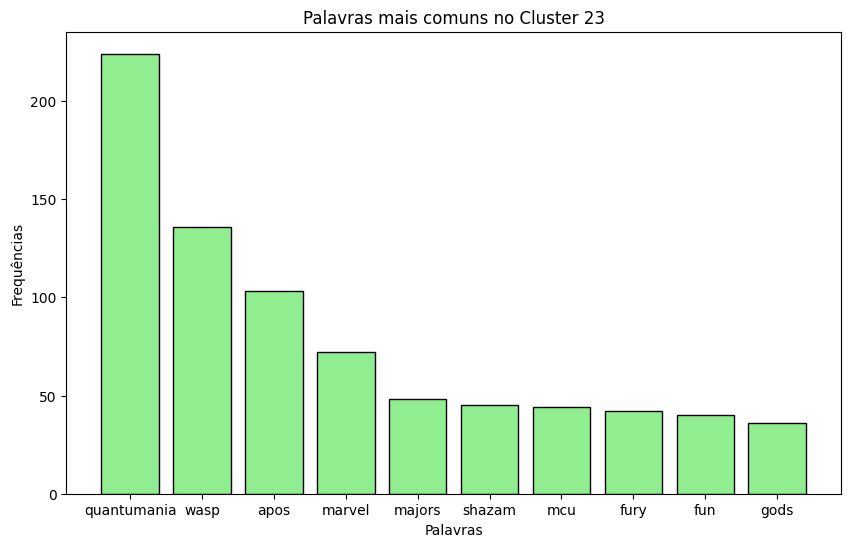

In [36]:
cluster_23 = [('quantumania', 224), ('wasp', 136), ('apos', 103), ('marvel', 72), ('majors', 48), ('shazam', 45), ('mcu', 44), ('fury', 42), ('fun', 40), ('gods', 36)]

palavras, frequencias = zip(*cluster_23)

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(palavras, frequencias, color='lightgreen', edgecolor='black')

# Adicionar títulos e rótulos
plt.title('Palavras mais comuns no Cluster 23')
plt.xlabel('Palavras')
plt.ylabel('Frequências')

# Exibir o gráfico
plt.show()

## sentimentos

In [9]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score


# Definir stopwords
stop_words = set(stopwords.words('english'))
stop_words.update(['movie', 'film'])

# Pré-processamento das críticas
def preprocess_text(text):
    tokens = word_tokenize(text.lower())  # Tokenização e conversão para minúsculas
    tokens = [word for word in tokens if word.isalpha()]  # Remover pontuação
    tokens = [word for word in tokens if word not in stop_words]  # Remover stopwords
    return " ".join(tokens)

# Aplicar pré-processamento
df_movies_critics_sem_ruido['processed_review'] = df_movies_critics_sem_ruido['reviewText'].apply(preprocess_text)

# Vetorização dos dados de texto
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Usando TF-IDF para vetorização
X = tfidf_vectorizer.fit_transform(df_movies_critics_sem_ruido['processed_review'])
y = df_movies_critics_sem_ruido['scoreSentiment']

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o classificador Naive Bayes
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Prever os sentimentos das críticas no conjunto de teste
y_pred = nb_classifier.predict(X_test)

# Avaliar a precisão do modelo
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7842756016989146


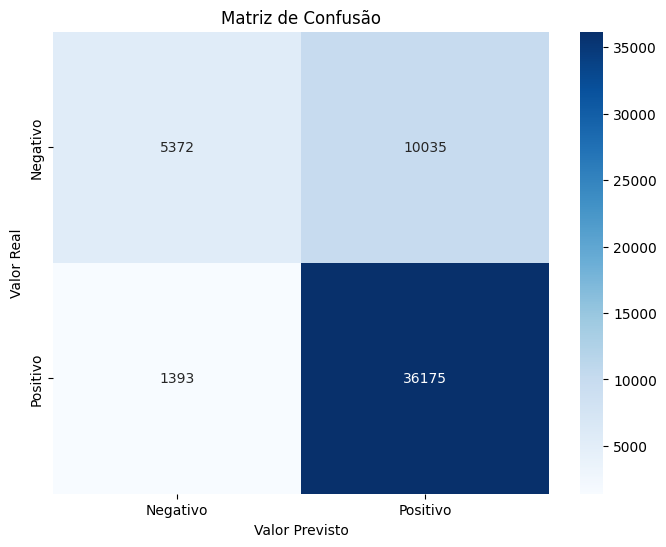

In [11]:
#%pip install seaborn

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calcular a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['Negativo', 'Positivo'], 
            yticklabels=['Negativo', 'Positivo'])
plt.title('Matriz de Confusão')
plt.xlabel('Valor Previsto')
plt.ylabel('Valor Real')
plt.show()


In [12]:
df_movies_critics_sem_ruido.to_csv('base_clusterizada_sem_ruido.csv', index=False)